**This code is for importing csv with Benchmark assets and saving them back in a  beautiful dataframe, for further concatenating with final big dataframe for regression modeling** 

In [ ]:
# import requests
import pandas as pd
import numpy as np 

In [ ]:
# Import Drive API and authenticate.
from google.colab import drive
# Mount your Drive to the Colab VM.
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
def load_benchmarks(path_to_file):
  # reading the big df with all assets
  benchmarks = pd.read_csv(path_to_file) 
  benchmarks = benchmarks.rename(columns={'day': 'Date'})
  benchmarks['Date'] = benchmarks['Date'].astype('datetime64[ns]') 
  benchmarks = benchmarks.set_index(['Date']) 

  # unique symbols 
  symbols = benchmarks["symbol"].unique()

  # list of smaller dataframes with a single benchmark asset 
  list_of_df = list() 

  for symbol in symbols:
    temp_df = pd.DataFrame() 
    temp_df = benchmarks.loc[benchmarks['symbol'] == symbol] 
    temp_df = temp_df.drop(['symbol'], axis=1) 
    # temp_df[symbol + '_returns'] = temp_df['price'].pct_change() 
    # temp_df = temp_df.rename(columns={'price': symbol + '_price'}) 
    temp_df = temp_df.rename(columns={'price': symbol + '_price'}) 
    # temp_df = temp_df.drop(columns = 'price')
    list_of_df.append(temp_df) 

  # final dataframe with beatufilly structured benchmark assets 
  final_benchmarks = pd.DataFrame() 

  for df in list_of_df: 
    final_benchmarks = pd.concat([final_benchmarks, df], axis=1) 
  
  return final_benchmarks 

In [ ]:
# checking function 
path = '/content/gdrive/My Drive/IndexCoop Capstone/CSV data files/Benchmark_Prices.csv'

df_benchmarks = load_benchmarks(path) 

df_benchmarks.to_csv('/content/gdrive/My Drive/IndexCoop Capstone/DPI analysis/datasets/benchmarks_returns_222.csv') 

In [ ]:
# it kinda works, doesn't it? 

df_benchmarks

,BNB_price,WBTC_price,WETH_price
Date,,,
2020-09-10,24.694691,10370.743982,367.160674
2020-09-11,24.157347,10297.893688,366.732687
2020-09-12,27.120354,10363.750201,374.442882
2020-09-13,30.514694,10378.939625,374.593340
2020-09-14,31.001882,10478.567625,371.063896
...,...,...,...
2022-10-01,282.318542,19346.640604,1323.227840
2022-10-02,282.769479,19250.261708,1303.535535
2022-10-03,286.100535,19330.403757,1303.939556


In [ ]:
bench_corr = df_benchmarks.corr() 

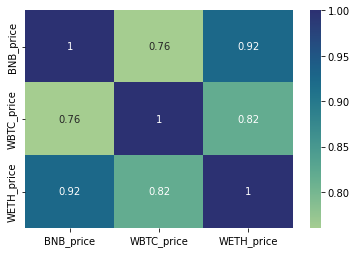

In [ ]:
import seaborn as sns

sns.heatmap(bench_corr, annot=True, cmap='crest') 